In [46]:
import csv
import pandas as pd
import shap
import sklearn
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('cohortpetit.csv')
data2 = pd.read_csv('cohort100.csv')

In [47]:
y = (data['i.coronari'])
data = data.drop(['id', 'i.death', 'i.coronari', 'i.ami', 'i.angor'], axis = 1)

In [48]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
# feature_names = [i for i in data.columns ]
X = data[feature_names]
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
# my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
##########
X100 = data2[feature_names]

In [49]:
feature_names

['user',
 'age',
 'men',
 'chdl',
 'cldl',
 'ct',
 'ggt',
 'glucosa',
 'got',
 'gpt',
 'tg',
 'pad',
 'pas',
 'i.pad',
 'i.stroke_i']

In [50]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

user = 0.0059
age = 0.0001
men = 0.011
chdl = -0.0016
cldl = -0.0007
ct = 0.0007
ggt = 0.0003
glucosa = 0.0002
got = 0.0006
gpt = -0.0013
tg = -0.0001
pad = 0.0013
pas = -0.0002
i.pad = -0.0357
i.stroke_i = 0.0293


In [51]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Permutation explainer: 1001it [00:35, 19.90it/s]                                


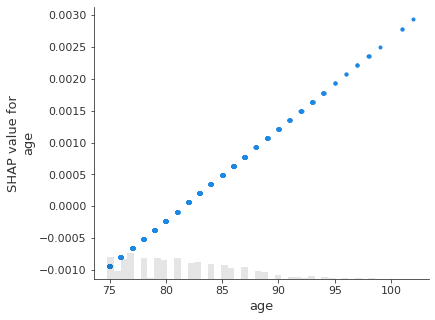

In [52]:
shap.plots.scatter(shap_values[:,"age"])

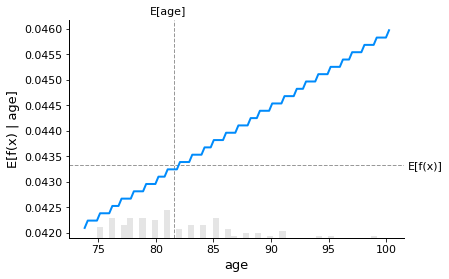

In [54]:
# make a standard partial dependence plot

shap.plots.partial_dependence(
    "age", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

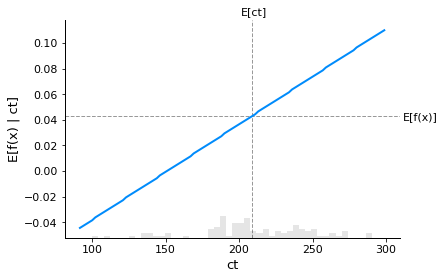

In [55]:
shap.plots.partial_dependence(
    "ct", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

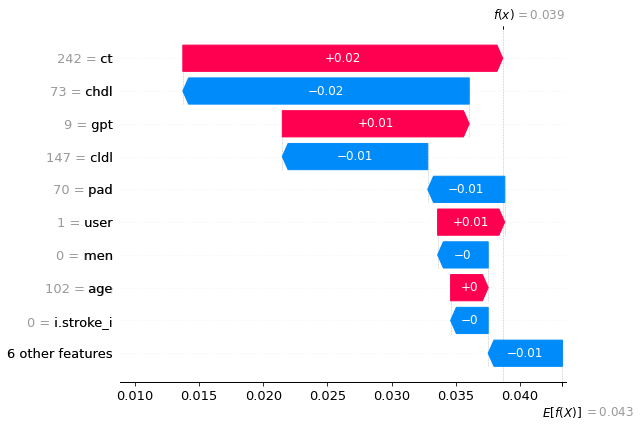

In [56]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)
sample_ind = data['age'].idxmax()
shap.plots.waterfall(shap_values[sample_ind], max_display=10)

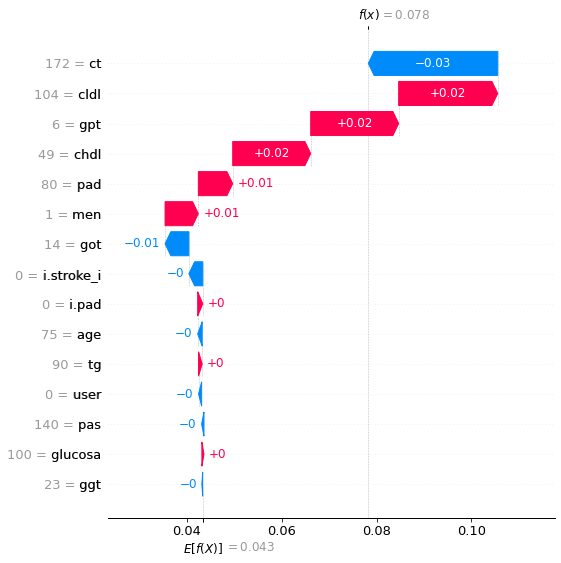

In [57]:
sample_ind = data['age'].idxmin()
shap.plots.waterfall(shap_values[sample_ind], max_display=17)